<a href="https://colab.research.google.com/github/YuvarajBalamurugan/Data-Science-and-ML/blob/main/MovieRecommendationfinal_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITLE OF PROJECT** : **MOVIE RECOMMENDATION SYSTEM**

**OBJECTIVE:**

Objectives for your movie recommendation project using machine learning with Python

*   **Data Collection and Preprocessing:** Obtain and clean a dataset containing movie information.
*   **Exploratory Data Analysis (EDA):** Analyze dataset distributions and relationships.

* **Feature Extraction and Representation:** Extract relevant features and represent movies.
*   **Collaborative Filtering Model:** Implement user-based or item-based collaborative filtering.

*   **Recommendation Generation:**Combine collaborative and content-based filtering.
*   **Evaluation Metrics:**Assess model performance using metrics like MAE or RMSE.








     



**DATA SOURCE**
https://drive.google.com/file/d/1cCkwiVv4mgfl20ntgY3n4yApcWqqZQe6/view?pli=1

**IMPORT LIBRARY**
   



In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


**IMPORT DATA**

In [164]:
movie_data = pd.read_csv('/content/movies.csv')

**DESCRIBE DATA**

In [165]:
movie_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [166]:
movie_data.shape

(4803, 24)

In [167]:
movie_data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [168]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [169]:
movie_data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

**DATA VISUALISATION**

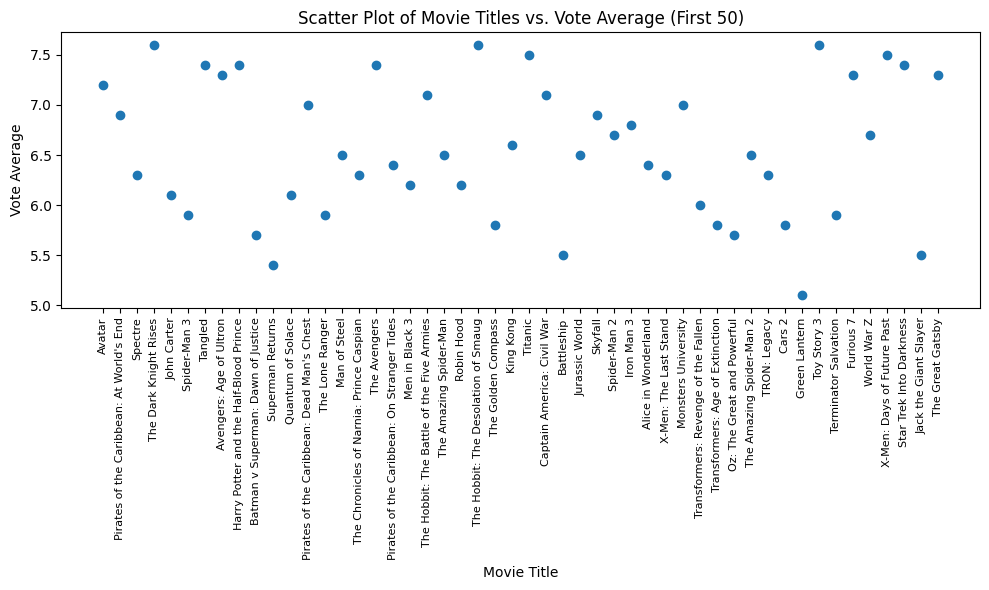

In [170]:
plt.figure(figsize=(10, 6))

plt.scatter(movie_data.title[:50], movie_data.vote_average[:50])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Movie Title")
plt.ylabel("Vote Average")
plt.title("Scatter Plot of Movie Titles vs. Vote Average (First 50)")
plt.tight_layout()
plt.show()

**DATA PREPROCESSING**

In [171]:
movie_data.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

**DEFINE TARGET VARIABLE(Y) AND FEATURE VARIABLES (X)**

In [172]:
selected_features = movie_data[['genres','keywords','tagline','cast','director']].fillna('')
selected_features.shape

(4803, 5)

In [173]:
for feature in selected_features:
  movie_data[feature] = movie_data[feature].fillna('')

In [174]:
combined_feature = movie_data['genres'] + ' ' + movie_data['keywords'] + ' ' + movie_data['tagline'] + ' ' + movie_data['cast'] + ' ' + movie_data['director']
combined_feature.shape


(4803,)

In [175]:
combined_feature = combined_feature.fillna('')


In [176]:
vectorizer = TfidfVectorizer()

In [177]:
X= vectorizer.fit_transform(combined_feature)

In [178]:
X.shape

(4803, 17318)

In [179]:
print(X)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

**MODELING**

In [180]:
similarity = cosine_similarity(X)

In [181]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [182]:
similarity.shape

(4803, 4803)

**PREDICTION**

In [183]:
movie_name = input('Enter your favourite movie name : ')

list_of_all_title = movie_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_title)
close_match = find_close_match[0]

index_of_the_movie = movie_data[movie_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movie_data[movie_data.index==index]['title'].values[0]
  if (i<=20):
    print(i, '.',title_from_index)
    i+=1


Enter your favourite movie name : avenger
Movies suggested for you : 

1 . The Avengers
2 . Avengers: Age of Ultron
3 . Captain America: The Winter Soldier
4 . Captain America: Civil War
5 . Iron Man 2
6 . Thor: The Dark World
7 . X-Men
8 . The Incredible Hulk
9 . X-Men: Apocalypse
10 . Ant-Man
11 . Thor
12 . X2
13 . X-Men: The Last Stand
14 . Deadpool
15 . X-Men: Days of Future Past
16 . Captain America: The First Avenger
17 . The Amazing Spider-Man 2
18 . The Image Revolution
19 . Iron Man
20 . Iron Man 3


**Explaination**   

*   **Import Data:** Loads movie data from a CSV file hosted on GitHub using the pandas library.
*   **Data Preprocessing:** Concatenates various text features (such as genre, keywords, tagline, cast, and director) into a single text column and handles missing values.
*  **Text Vectorization:** The TF-IDF vectorization technique is used to convert the text data into numerical features. These numerical features represent the importance of words in each movie's description.
*  **Model Evaluation:** computes cosine similarity between all pairs of movies based on their TF-IDF vectors, creating a similarity score matrix.
*   **User Input and Recommendations:** The user is prompted to input their favorite movie title. The code then finds the closest match to this input, calculates the similarity scores between this movie and all others, and suggests the top recommended movies based on similarity.

**In summary, TF-IDF vectorization and cosine similarity are used to suggest movies similar to a user's favorite movie based on textual features.**









